<a href="https://colab.research.google.com/github/Sudin2001/Project-Of-ML/blob/main/Travclan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traveler Booking Data **Analysis**



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
count,30000.000000,30000.000000,30000,30000.000000,30000,24532,24532,30000,30000.000000,30000,...,30000.000000,30000,30000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000
unique,NaN,NaN,10,NaN,395,452,453,3,NaN,2,...,NaN,4,2,NaN,3,3,334,NaN,NaN,2
top,NaN,NaN,Chicago,NaN,2025-02-24,2025-04-28,2025-01-06,Standard,NaN,Leisure,...,NaN,Debit Card,Yes,NaN,Web,Confirmed,2024-08-21,NaN,NaN,No
freq,NaN,NaN,3059,NaN,77,82,87,16552,NaN,18110,...,NaN,7603,23512,NaN,16023,21672,192,NaN,NaN,23807
mean,249.721767,3.777533,NaN,3.602033,NaN,NaN,NaN,NaN,1.352333,NaN,...,29504.818500,NaN,NaN,320.938376,NaN,NaN,NaN,3.831534,4.134988,NaN
std,145.484836,2.081471,NaN,0.860241,NaN,NaN,NaN,NaN,0.574403,NaN,...,12119.627338,NaN,NaN,339.635396,NaN,NaN,NaN,4.783590,10.846221,NaN
min,1.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,...,5003.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,-3.532183,NaN
25%,123.000000,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,NaN,...,19750.500000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,248.000000,3.000000,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,...,29752.500000,NaN,NaN,221.141185,NaN,NaN,NaN,1.030180,0.000000,NaN
75%,376.000000,5.000000,NaN,4.000000,NaN,NaN,NaN,NaN,2.000000,NaN,...,39826.000000,NaN,NaN,594.624344,NaN,NaN,NaN,7.378533,0.000000,NaN


,0
customer_id,0
property_id,0
city,0
star_rating,0
booking_date,0
check_in_date,5468
check_out_date,5468
room_type,0
num_rooms_booked,0
stay_type,0


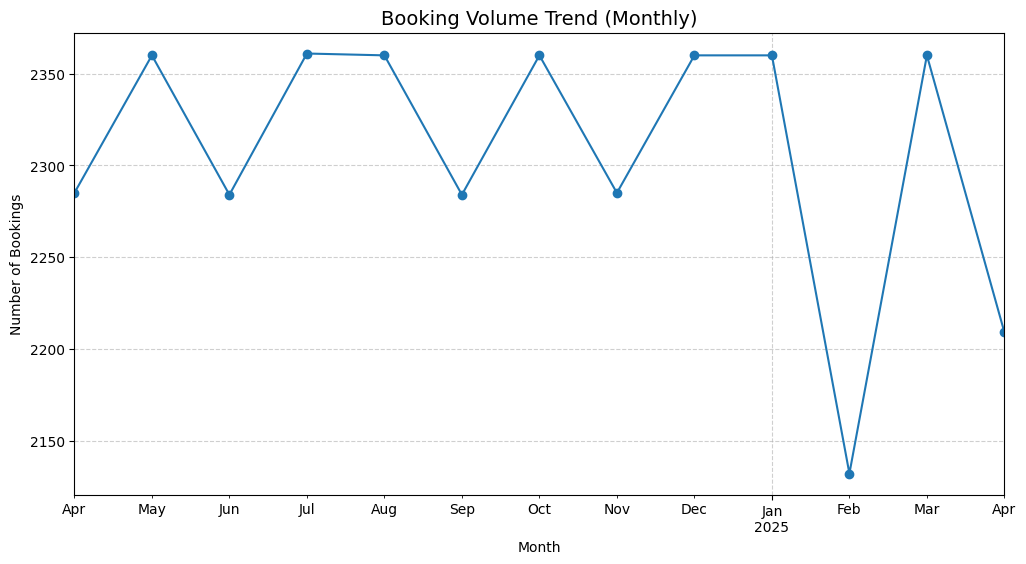

In [ ]:
# Identifying trend of Booking volume.
import pandas as pd
import matplotlib.pyplot as plt
merged_df = pd.read_csv("/content/drive/MyDrive/Dataset (2).csv")

merged_df.info()
display(merged_df.describe(include='all'))
display(merged_df.isnull().sum())

merged_df['booking_date'] = pd.to_datetime(merged_df['booking_date'],)

booking_trend = (
    merged_df
    .groupby(merged_df['booking_date'].dt.to_period("M"))['customer_id']
    .count()
)

# Plot the trend
plt.figure(figsize=(12,6))
booking_trend.plot(kind='line', marker='o')
plt.title("Booking Volume Trend (Monthly)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
merged_df['booking_date'] = pd.to_datetime(merged_df['booking_date'], errors='coerce')


In [ ]:
revenue_trend = (
    merged_df
    .groupby(merged_df['booking_date'].dt.to_period("M"))['selling_price']
    .sum()
)


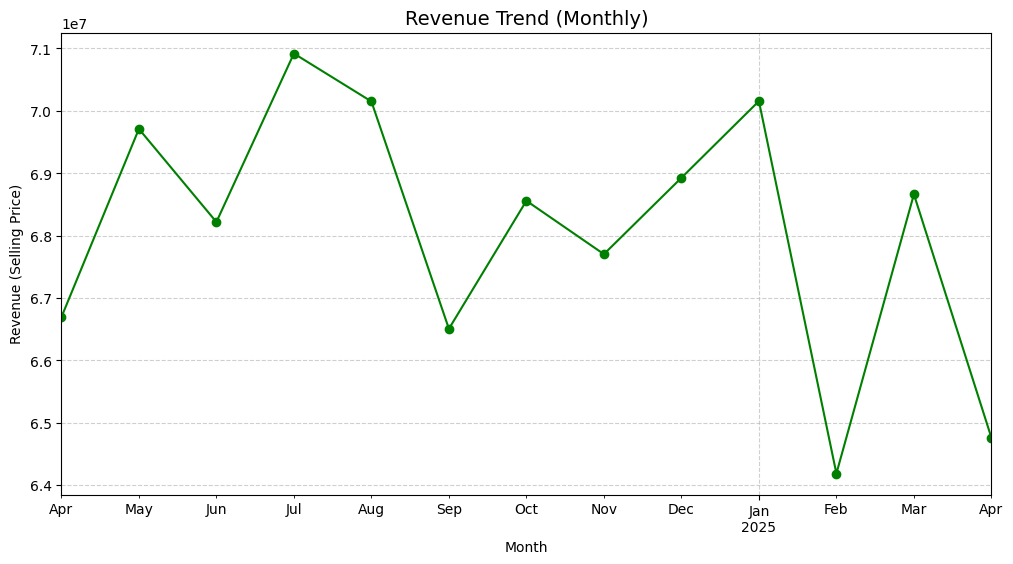

In [ ]:
plt.figure(figsize=(12,6))
revenue_trend.plot(kind='line', marker='o', color='green')
plt.title("Revenue Trend (Monthly)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Revenue (Selling Price)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
city_trend = (
    merged_df
    .groupby([merged_df['booking_date'].dt.to_period("M"), 'city'])['customer_id']
    .count()
    .reset_index()
)


In [ ]:
city_trend_pivot = city_trend.pivot(index='booking_date', columns='city', values='customer_id')


<Figure size 1400x700 with 0 Axes>

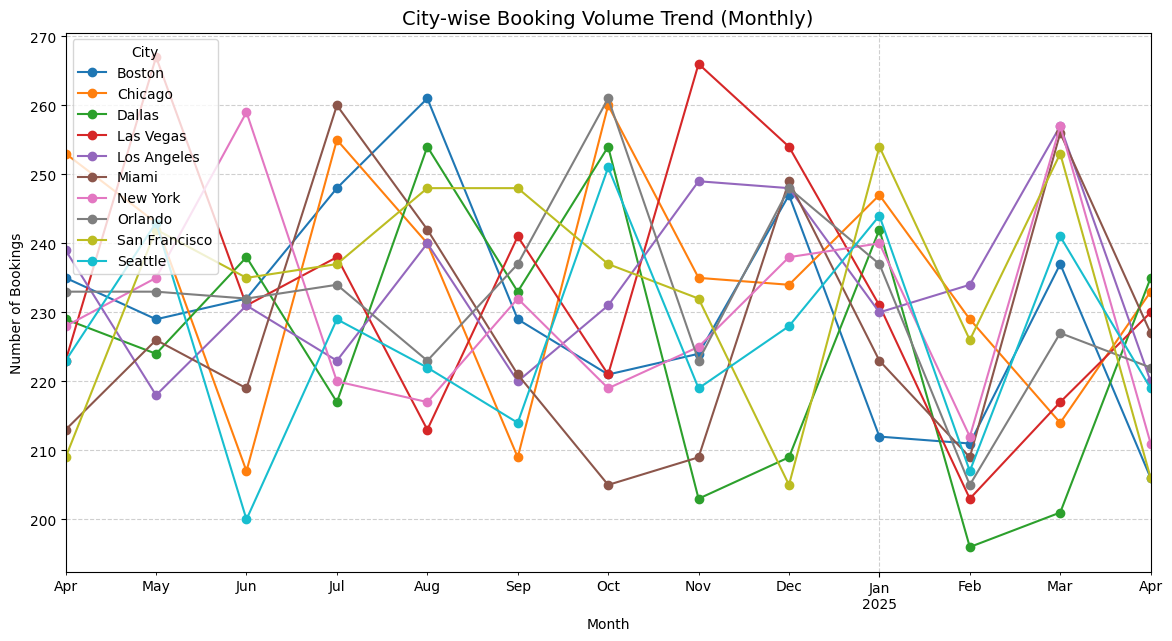

In [ ]:

plt.figure(figsize=(14,7))
city_trend_pivot.plot(kind='line', marker='o', figsize=(14,7))
plt.title("City-wise Booking Volume Trend (Monthly)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title="City")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


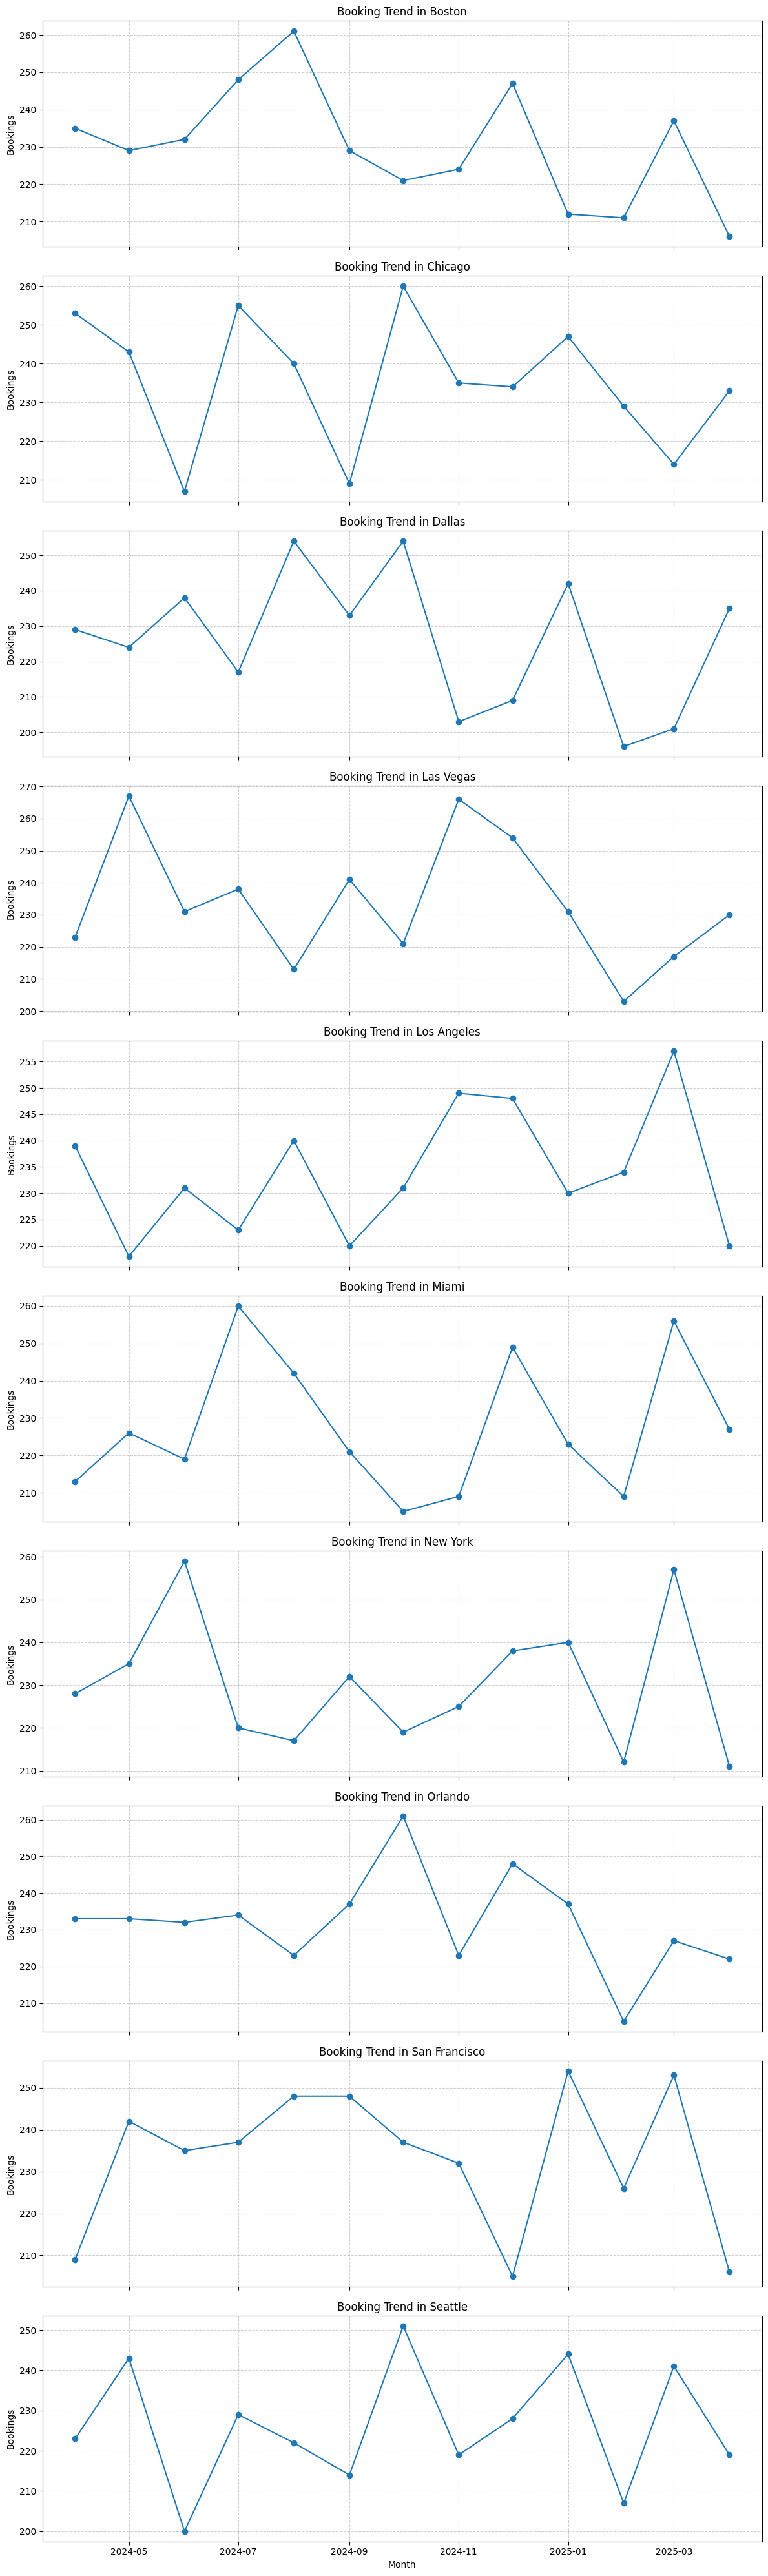

In [ ]:
cities = city_trend['city'].unique()

# Create subplots (rows = number of cities)
fig, axes = plt.subplots(len(cities), 1, figsize=(12, 4*len(cities)), sharex=True)

for i, city in enumerate(cities):
    city_data = city_trend[city_trend['city'] == city]
    # Convert 'booking_date' back to datetime objects for plotting
    axes[i].plot(city_data['booking_date'].dt.to_timestamp(), city_data['customer_id'], marker='o')
    axes[i].set_title(f"Booking Trend in {city}")
    axes[i].set_ylabel("Bookings")
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [ ]:
payment_trend = (
    merged_df
    .groupby([merged_df['booking_date'].dt.to_period("M"), 'payment_method'])['customer_id']
    .count()
    .reset_index()
)
payment_trend['booking_date'] = payment_trend['booking_date'].dt.to_timestamp()


In [ ]:
payment_trend_pivot = payment_trend.pivot(index='booking_date', columns='payment_method', values='customer_id')


<Figure size 1400x700 with 0 Axes>

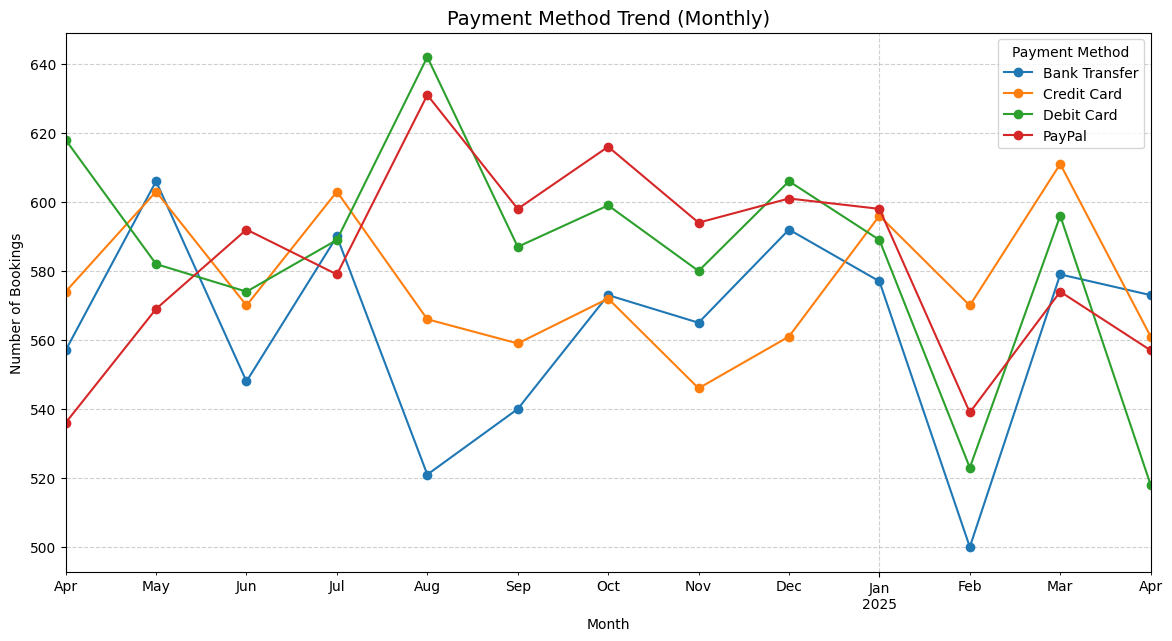

In [ ]:

plt.figure(figsize=(14,7))
payment_trend_pivot.plot(kind='line', marker='o', figsize=(14,7))
plt.title("Payment Method Trend (Monthly)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title="Payment Method")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
revenue_trend = (
    merged_df
    .groupby(merged_df['booking_date'].dt.to_period("M"))['selling_price']
    .sum()
    .reset_index()
)
revenue_trend['booking_date'] = revenue_trend['booking_date'].dt.to_timestamp()


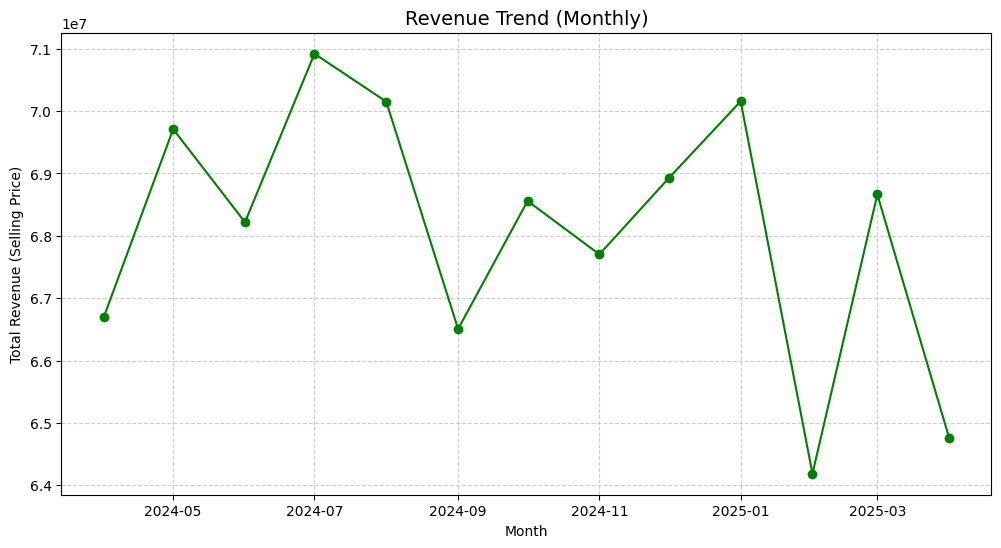

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(revenue_trend['booking_date'], revenue_trend['selling_price'], marker='o', color='green')
plt.title("Revenue Trend (Monthly)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Revenue (Selling Price)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


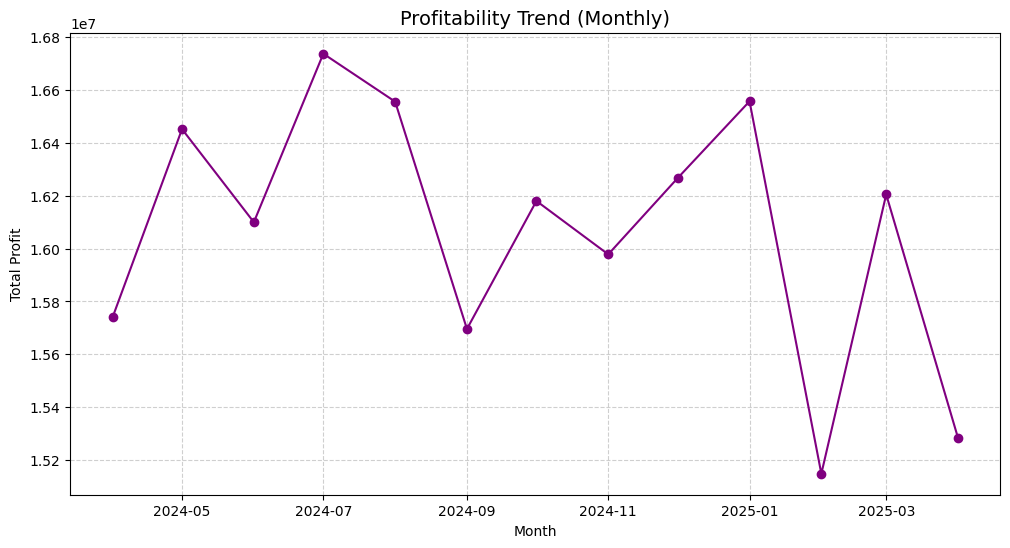

In [ ]:
# Calculate Profitability trend-
merged_df['profit'] = merged_df['selling_price'] - merged_df['costprice']

merged_df['profit_margin'] = (merged_df['profit'] / merged_df['costprice']) * 100

# Group by month and sum profits
profit_trend = (
    merged_df
    .groupby(merged_df['booking_date'].dt.to_period("M"))['profit']
    .sum()
    .reset_index()
)
profit_trend['booking_date'] = profit_trend['booking_date'].dt.to_timestamp()

# Plot Profit Trend
plt.figure(figsize=(12,6))
plt.plot(profit_trend['booking_date'], profit_trend['profit'], marker='o', color='purple')
plt.title("Profitability Trend (Monthly)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
channel_trend = (
    merged_df
    .groupby([merged_df['booking_date'].dt.to_period("M"), 'booking_channel'])['customer_id']
    .count()
    .reset_index()
)
channel_trend['booking_date'] = channel_trend['booking_date'].dt.to_timestamp()


In [ ]:
channel_pivot = channel_trend.pivot(index='booking_date', columns='booking_channel', values='customer_id')


<Figure size 1400x700 with 0 Axes>

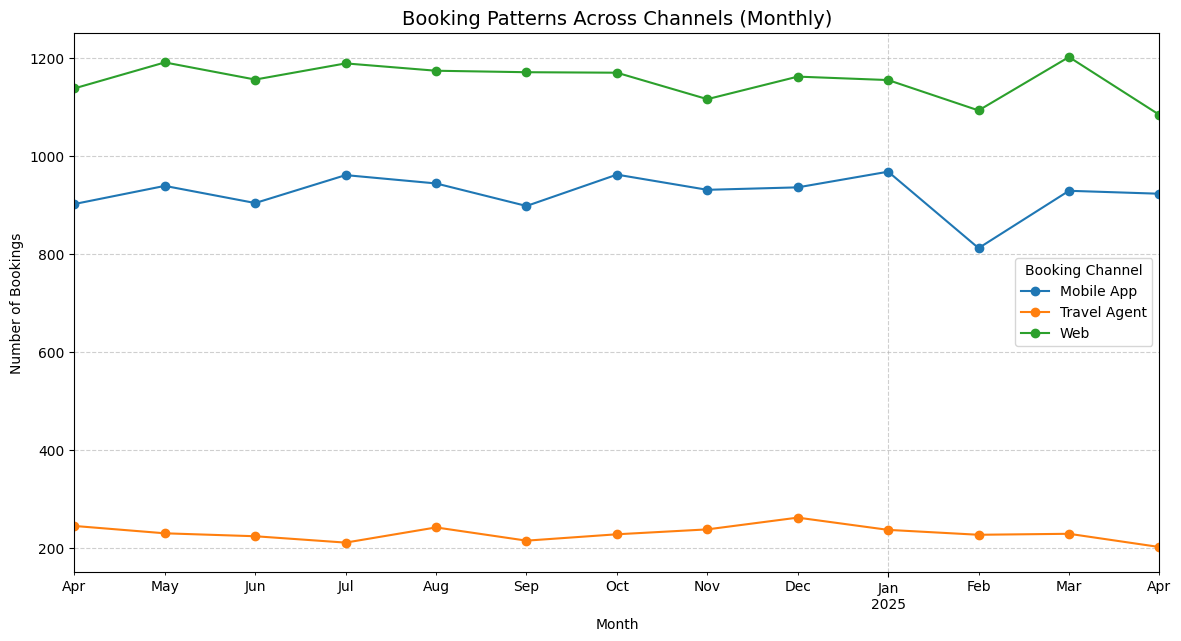

In [ ]:


plt.figure(figsize=(14,7))
channel_pivot.plot(kind='line', marker='o', figsize=(14,7))
plt.title("Booking Patterns Across Channels (Monthly)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title="Booking Channel")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
room_trend = (
    merged_df
    .groupby([merged_df['booking_date'].dt.to_period("M"), 'num_rooms_booked'])['customer_id']
    .count()
    .reset_index()
)
room_trend['booking_date'] = room_trend['booking_date'].dt.to_timestamp()


In [ ]:
room_pivot = room_trend.pivot(index='booking_date', columns='num_rooms_booked', values='customer_id')


<Figure size 1400x700 with 0 Axes>

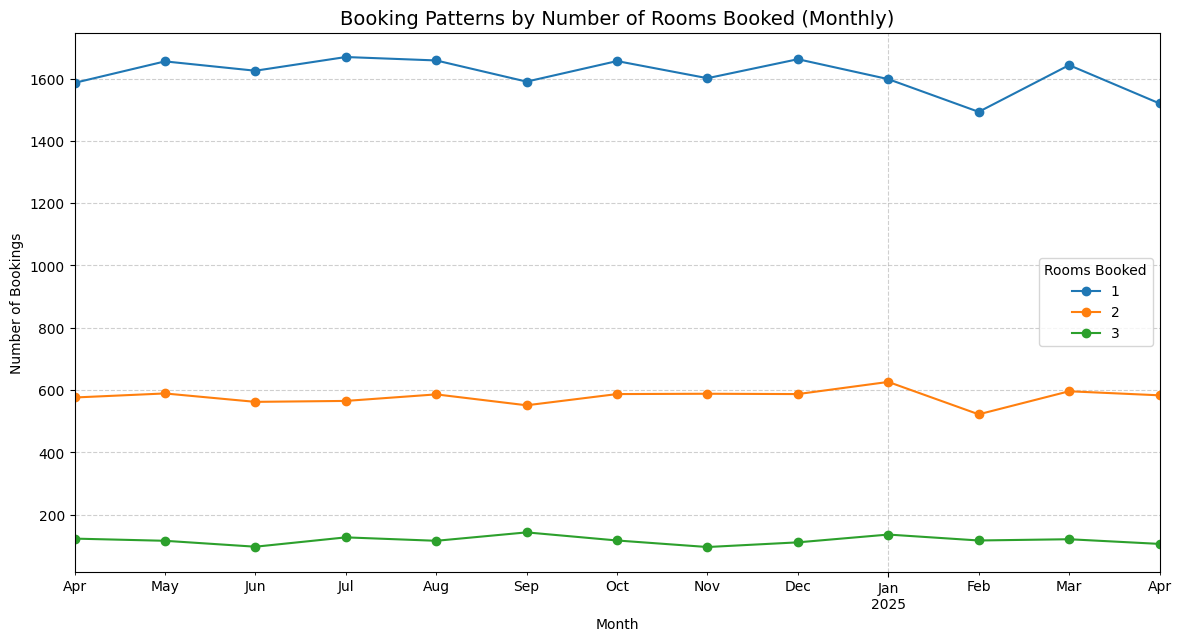

In [ ]:
plt.figure(figsize=(14,7))
room_pivot.plot(kind='line', marker='o', figsize=(14,7))
plt.title("Booking Patterns by Number of Rooms Booked (Monthly)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title="Rooms Booked")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
merged_df['room_type'].unique()


array(['Standard', 'Deluxe', 'Suite'], dtype=object)

In [ ]:
room_type_counts = (
    merged_df.groupby('room_type')
    .size()
    .reset_index(name='booking_count')
    .sort_values(by='booking_count', ascending=False)
)
print(room_type_counts)


  room_type  booking_count
1  Standard          16552
0    Deluxe          10478
2     Suite           2970


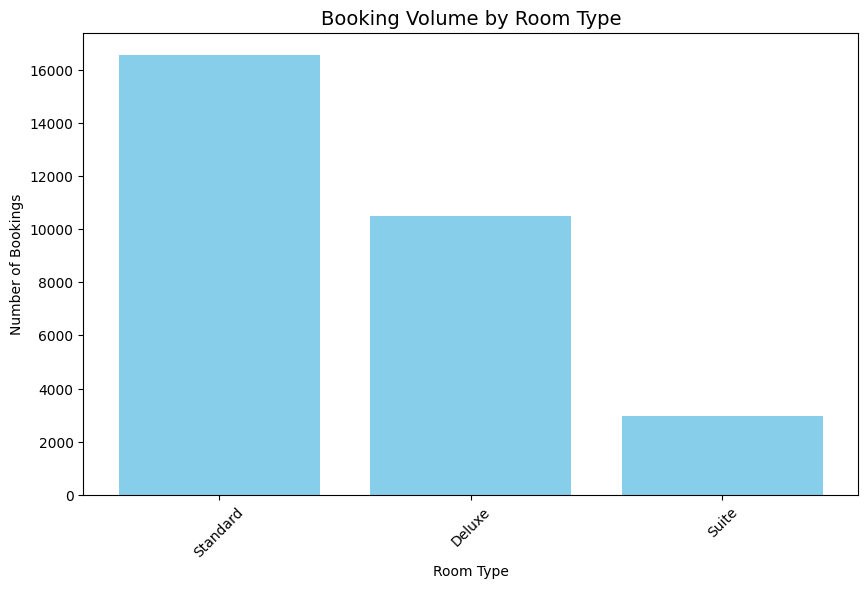

In [ ]:

plt.figure(figsize=(10,6))
plt.bar(room_type_counts['room_type'], room_type_counts['booking_count'], color="skyblue")
plt.title("Booking Volume by Room Type", fontsize=14)
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


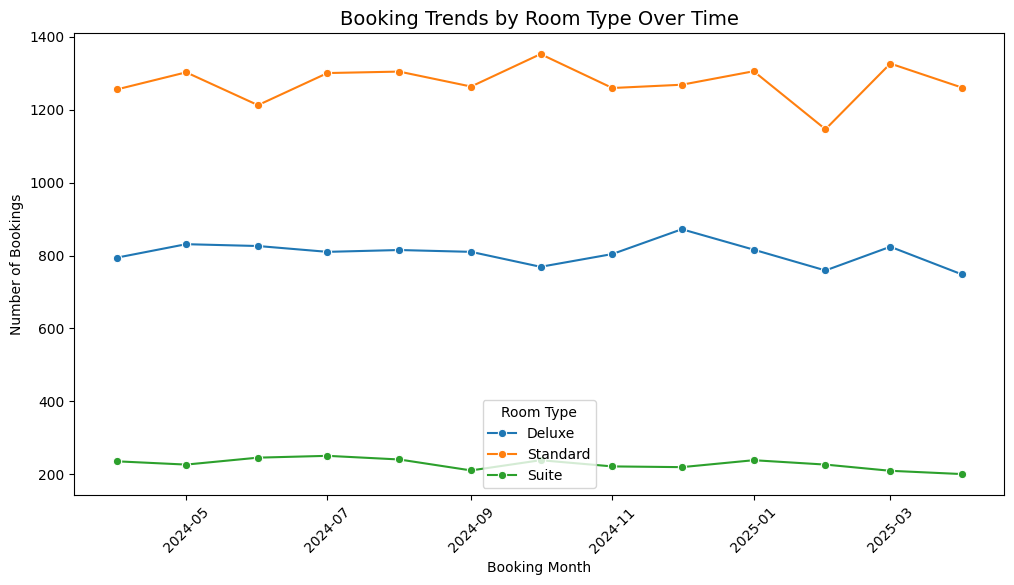

In [ ]:
# Extract booking month
merged_df['booking_month'] = pd.to_datetime(merged_df['booking_date']).dt.to_period('M')

room_trend = (
    merged_df.groupby(['booking_month', 'room_type'])
    .size()
    .reset_index(name='booking_count')
)

room_trend['booking_month'] = room_trend['booking_month'].dt.to_timestamp()

import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=room_trend, x='booking_month', y='booking_count', hue='room_type', marker="o")
plt.title("Booking Trends by Room Type Over Time", fontsize=14)
plt.xlabel("Booking Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.legend(title="Room Type")
plt.show()

In [ ]:
merged_df['booking_date'] = pd.to_datetime(merged_df['booking_date'], errors='coerce')


In [ ]:
star_trend = (
    merged_df
    .groupby([merged_df['booking_date'].dt.to_period("M"), 'star_rating'])['customer_id']
    .count()
    .reset_index()
)
star_trend['booking_date'] = star_trend['booking_date'].dt.to_timestamp()

In [ ]:
star_pivot = star_trend.pivot(index='booking_date', columns='star_rating', values='customer_id')


<Figure size 1400x700 with 0 Axes>

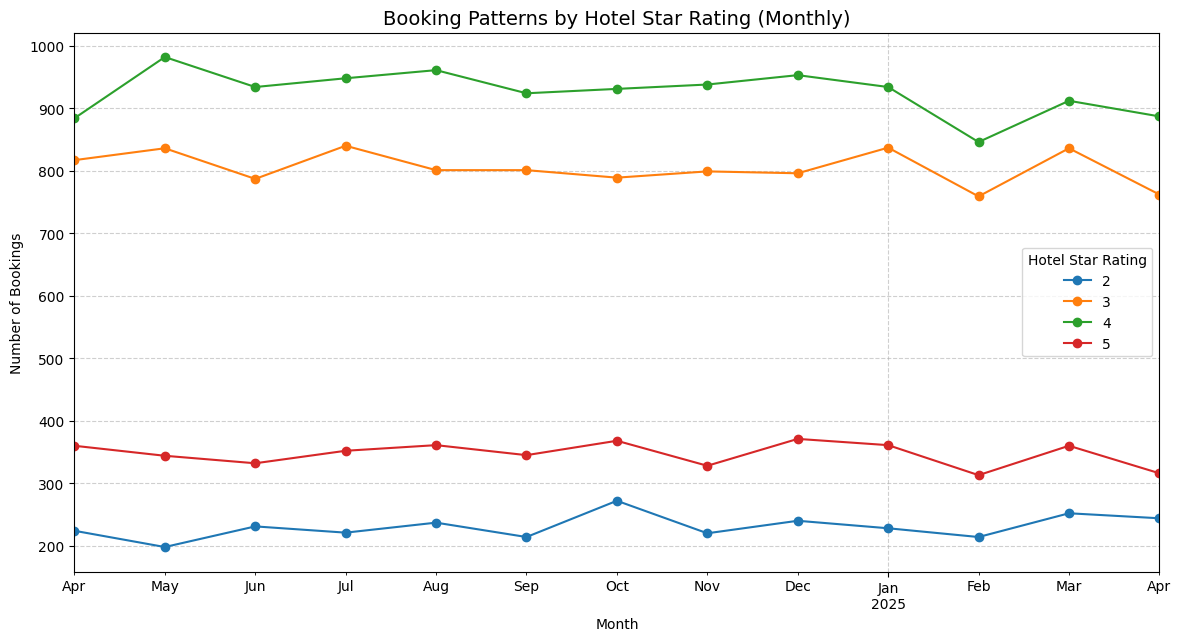

In [ ]:
plt.figure(figsize=(14,7))
star_pivot.plot(kind='line', marker='o', figsize=(14,7))
plt.title("Booking Patterns by Hotel Star Rating (Monthly)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title="Hotel Star Rating")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Cancellation analysis

In [ ]:
display(merged_df.columns)

Index(['customer_id', 'property_id', 'city', 'star_rating', 'booking_date',
       'check_in_date', 'check_out_date', 'room_type', 'num_rooms_booked',
       'stay_type', 'booking_channel', 'booking_value', 'costprice', 'markup',
       'selling_price', 'payment_method', 'refund_status', 'refund_amount',
       'channel_of_booking', 'booking_status', 'travel_date', 'cashback',
       'coupon_redeem', 'Coupon USed?', 'profit', 'profit_margin',
       'booking_month'],
      dtype='object')

In [ ]:
# 1. Create 'lead_time' column (already done in previous attempt, but including for completeness)
merged_df['booking_date'] = pd.to_datetime(merged_df['booking_date'])
merged_df['travel_date'] = pd.to_datetime(merged_df['travel_date'])
merged_df['lead_time'] = (merged_df['travel_date'] - merged_df['booking_date']).dt.days

# 2. Convert 'booking_status' to categorical (already done in previous attempt, but including for completeness)
merged_df['booking_status'] = merged_df['booking_status'].astype('category')

# 3. Calculate cancellation rate for each booking channel (already done in previous attempt, but including for completeness)
cancellation_rate_channel = merged_df.groupby('booking_channel')['booking_status'].apply(
    lambda x: (x == 'Cancelled').sum() / len(x)
).reset_index(name='cancellation_rate')

# 4. Calculate cancellation rate for each property ID
cancellation_rate_property = merged_df.groupby('property_id')['booking_status'].apply(
    lambda x: (x == 'Cancelled').sum() / len(x)
).reset_index(name='cancellation_rate')

# 5. Calculate the average lead time for canceled and confirmed bookings (already done in previous attempt, but including for completeness)
average_lead_time = merged_df.groupby('booking_status')['lead_time'].mean().reset_index()

display(cancellation_rate_channel)
display(cancellation_rate_property)
display(average_lead_time)

/tmp/ipython-input-36791308.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_lead_time = merged_df.groupby('booking_status')['lead_time'].mean().reset_index()


,booking_channel,cancellation_rate
0,Mobile App,0.215588
1,Travel Agent,0.279264
2,Web,0.176388


,property_id,cancellation_rate
0,1,0.203713
1,3,0.208987
2,5,0.197965
3,7,0.198481


,booking_status,lead_time
0,Cancelled,-79.721417
1,Confirmed,-83.408869
2,Failed,-79.095217


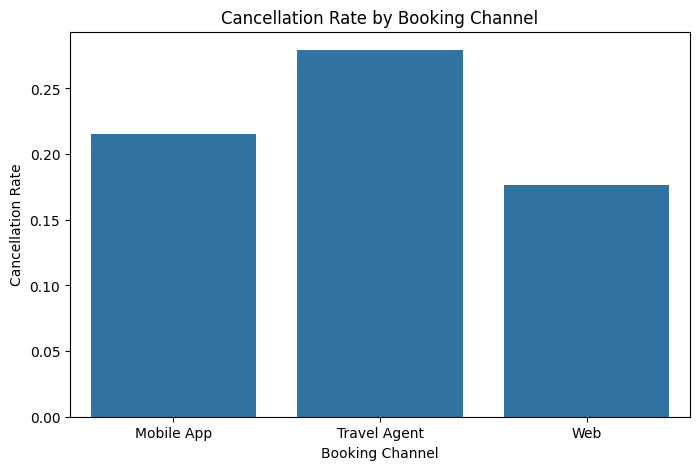

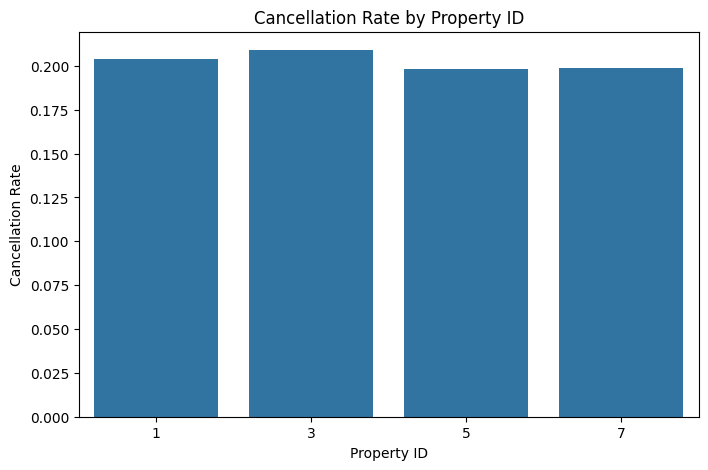

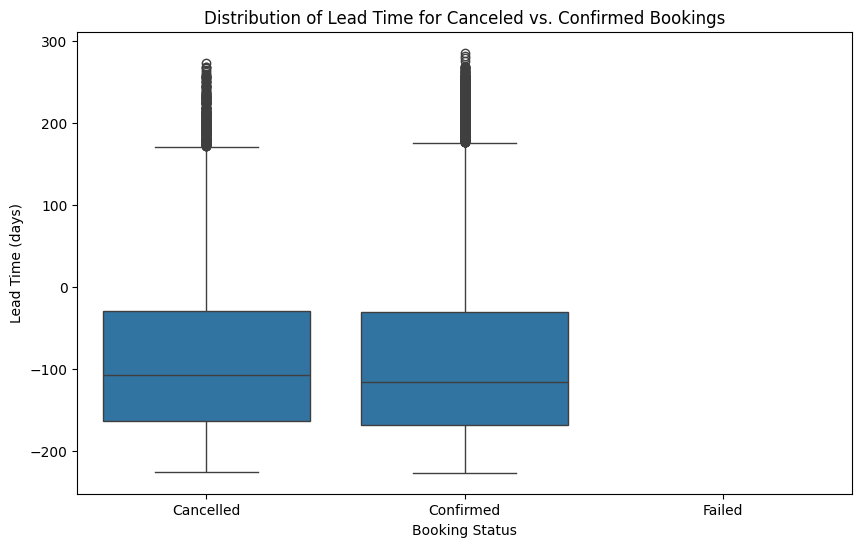

In [ ]:
# Create a bar plot to visualize the cancellation rate by booking channel
plt.figure(figsize=(8, 5))
sns.barplot(x='booking_channel', y='cancellation_rate', data=cancellation_rate_channel)
plt.title('Cancellation Rate by Booking Channel')
plt.xlabel('Booking Channel')
plt.ylabel('Cancellation Rate')
plt.show()

# Create a bar plot to visualize the cancellation rate by property ID
plt.figure(figsize=(8, 5))
sns.barplot(x='property_id', y='cancellation_rate', data=cancellation_rate_property)
plt.title('Cancellation Rate by Property ID')
plt.xlabel('Property ID')
plt.ylabel('Cancellation Rate')
plt.show()

# Create a box plot to visualize the distribution of lead time for canceled versus confirmed bookings
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='lead_time', data=merged_df[merged_df['booking_status'].isin(['Cancelled', 'Confirmed'])])
plt.title('Distribution of Lead Time for Canceled vs. Confirmed Bookings')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')
plt.show()

In [ ]:
merged_df['is_cancelled'] = merged_df['booking_status'].str.lower().eq("cancelled")


In [ ]:
cancel_trend = (
    merged_df
    .groupby(merged_df['booking_date'].dt.to_period("M"))['is_cancelled']
    .mean()
    .reset_index()
)
cancel_trend['booking_date'] = cancel_trend['booking_date'].dt.to_timestamp()


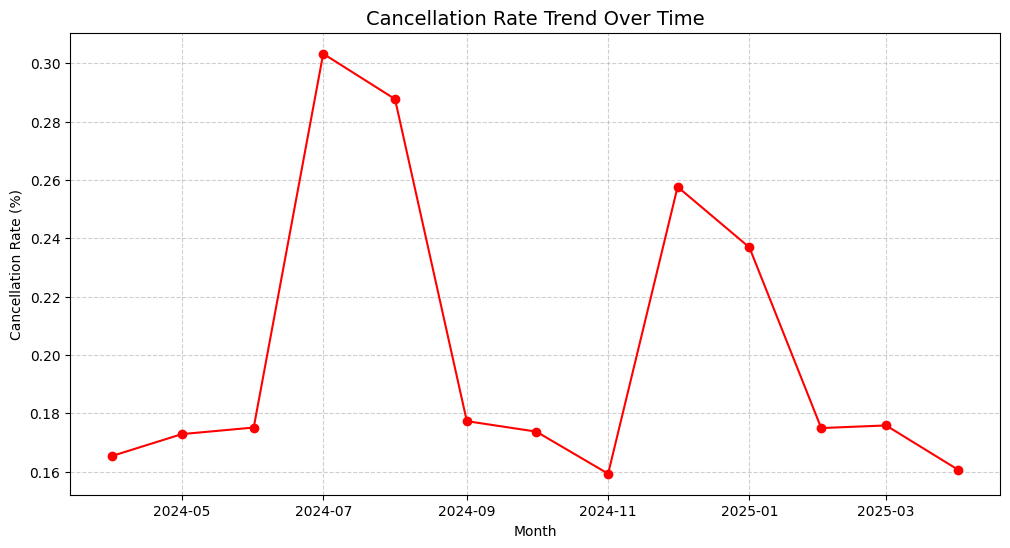

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(cancel_trend['booking_date'], cancel_trend['is_cancelled'], marker='o', color='red')
plt.title("Cancellation Rate Trend Over Time", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [ ]:
city_cancel = (
    merged_df.groupby('city')['is_cancelled']
    .sum()   # total cancelled bookings
    .reset_index()
    .sort_values(by='is_cancelled', ascending=False)
)


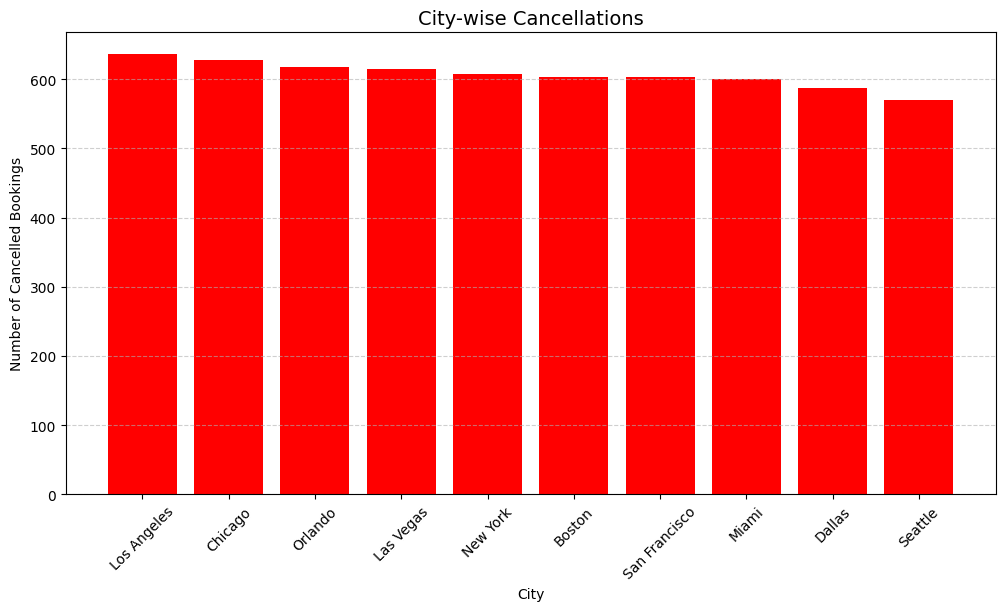

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(city_cancel['city'], city_cancel['is_cancelled'], color='red')
plt.title("City-wise Cancellations", fontsize=14)
plt.xlabel("City")
plt.ylabel("Number of Cancelled Bookings")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
avg_amount = merged_df.groupby('is_cancelled')['selling_price'].mean()
print(avg_amount)


is_cancelled
False    29481.254576
True     29597.715486
Name: selling_price, dtype: float64


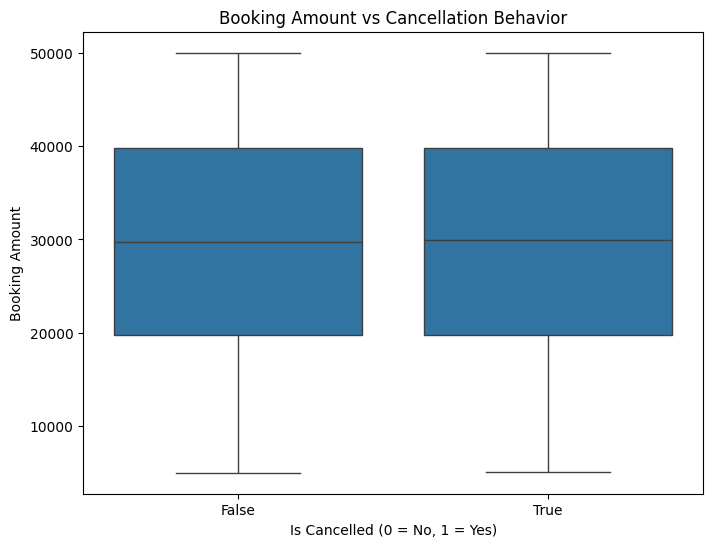

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='is_cancelled', y='selling_price', data=merged_df)
plt.title("Booking Amount vs Cancellation Behavior")
plt.xlabel("Is Cancelled (0 = No, 1 = Yes)")
plt.ylabel("Booking Amount")
plt.show()


Performance analysis

In [ ]:

# Convert date columns to datetime objects
merged_df['check_in_date'] = pd.to_datetime(merged_df['check_in_date'])
merged_df['check_out_date'] = pd.to_datetime(merged_df['check_out_date'])

# Calculate stay length
merged_df['stay_length'] = (merged_df['check_out_date'] - merged_df['check_in_date']).dt.days

# Calculate total booking value, average stay length, and conversion rate for each booking channel
booking_channel_performance = merged_df.groupby('booking_channel').agg(
    total_booking_value=('booking_value', 'sum'),
    average_stay_length=('stay_length', 'mean'),
    total_bookings=('booking_status', 'count')
).reset_index()

# Calculate confirmed bookings for conversion rate
confirmed_bookings_channel = merged_df[merged_df['booking_status'] == 'Confirmed'].groupby('booking_channel').size().reset_index(name='confirmed_bookings')

# Merge to calculate conversion rate
booking_channel_performance = pd.merge(booking_channel_performance, confirmed_bookings_channel, on='booking_channel', how='left').fillna(0)
booking_channel_performance['conversion_rate'] = booking_channel_performance['confirmed_bookings'] / booking_channel_performance['total_bookings']

display(booking_channel_performance)

# Calculate total booking value, average stay length, and conversion rate for each property ID
property_performance = merged_df.groupby('property_id').agg(
    total_booking_value=('booking_value', 'sum'),
    average_stay_length=('stay_length', 'mean'),
    total_bookings=('booking_status', 'count')
).reset_index()

# Calculate confirmed bookings for conversion rate
confirmed_bookings_property = merged_df[merged_df['booking_status'] == 'Confirmed'].groupby('property_id').size().reset_index(name='confirmed_bookings')

# Merge to calculate conversion rate
property_performance = pd.merge(property_performance, confirmed_bookings_property, on='property_id', how='left').fillna(0)
property_performance['conversion_rate'] = property_performance['confirmed_bookings'] / property_performance['total_bookings']

display(property_performance)

,booking_channel,total_booking_value,average_stay_length,total_bookings,confirmed_bookings,conversion_rate
0,Mobile App,2.564076e+08,3.997041,12009,8111,0.675410
1,Travel Agent,7.311738e+07,3.978851,2990,1979,0.661873
2,Web,4.228908e+08,4.019352,15001,11582,0.772082


,property_id,total_booking_value,average_stay_length,total_bookings,confirmed_bookings,conversion_rate
0,1,1.958971e+08,3.973635,7810,5646,0.722919
1,3,1.909854e+08,4.003246,7589,5409,0.712742
2,5,2.435821e+08,4.026438,9729,7039,0.723507
3,7,1.219512e+08,4.026139,4872,3578,0.734401


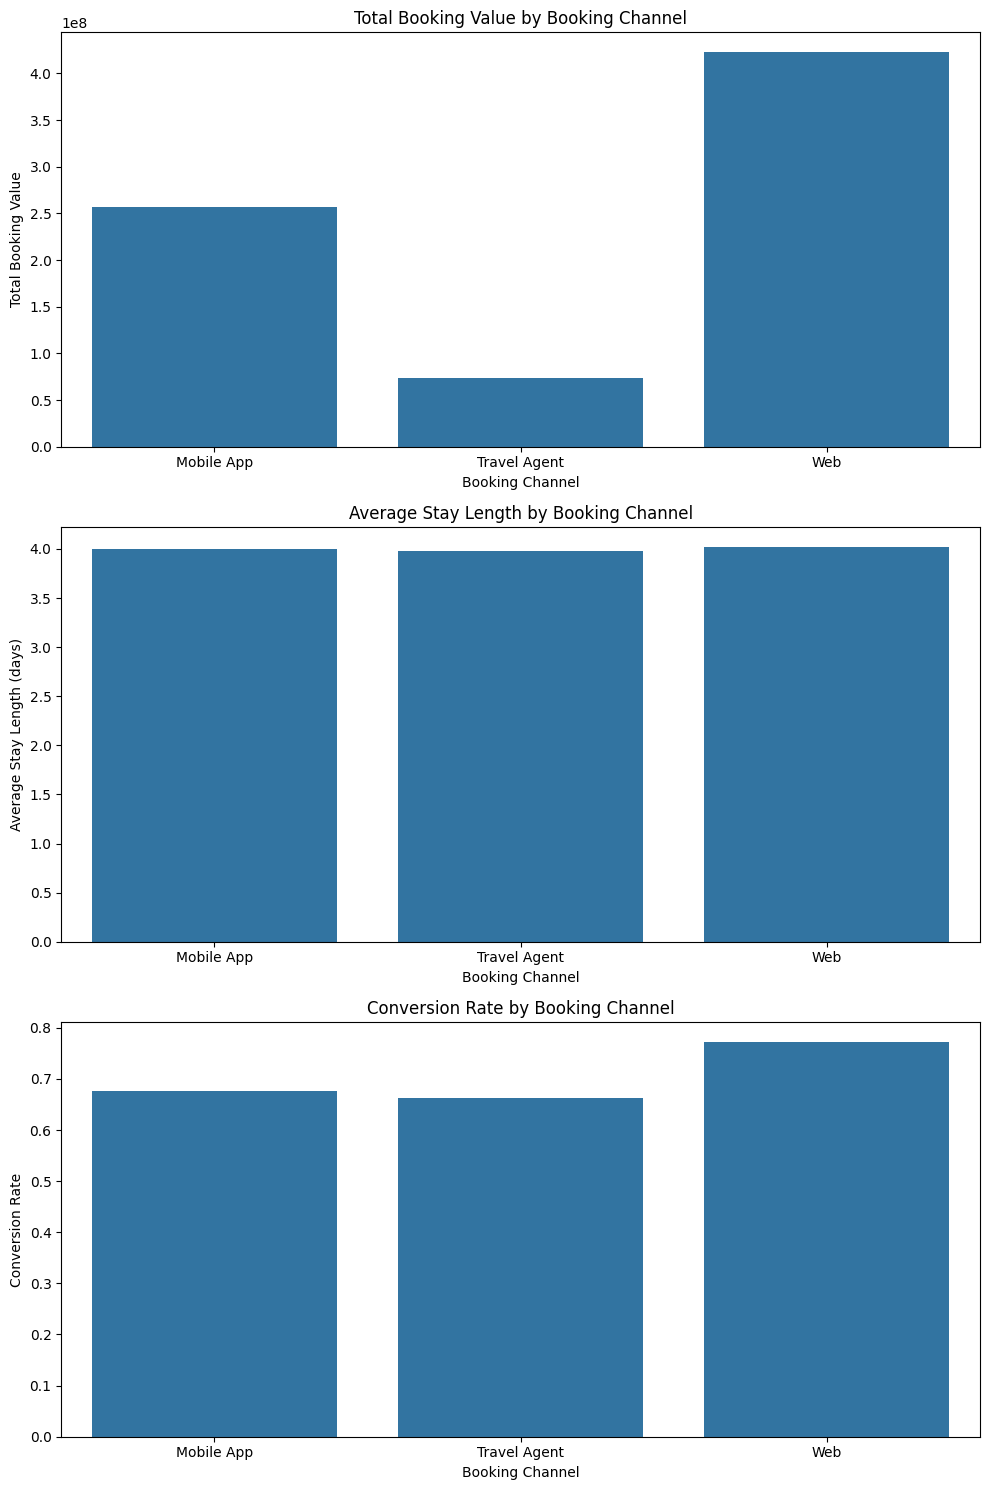

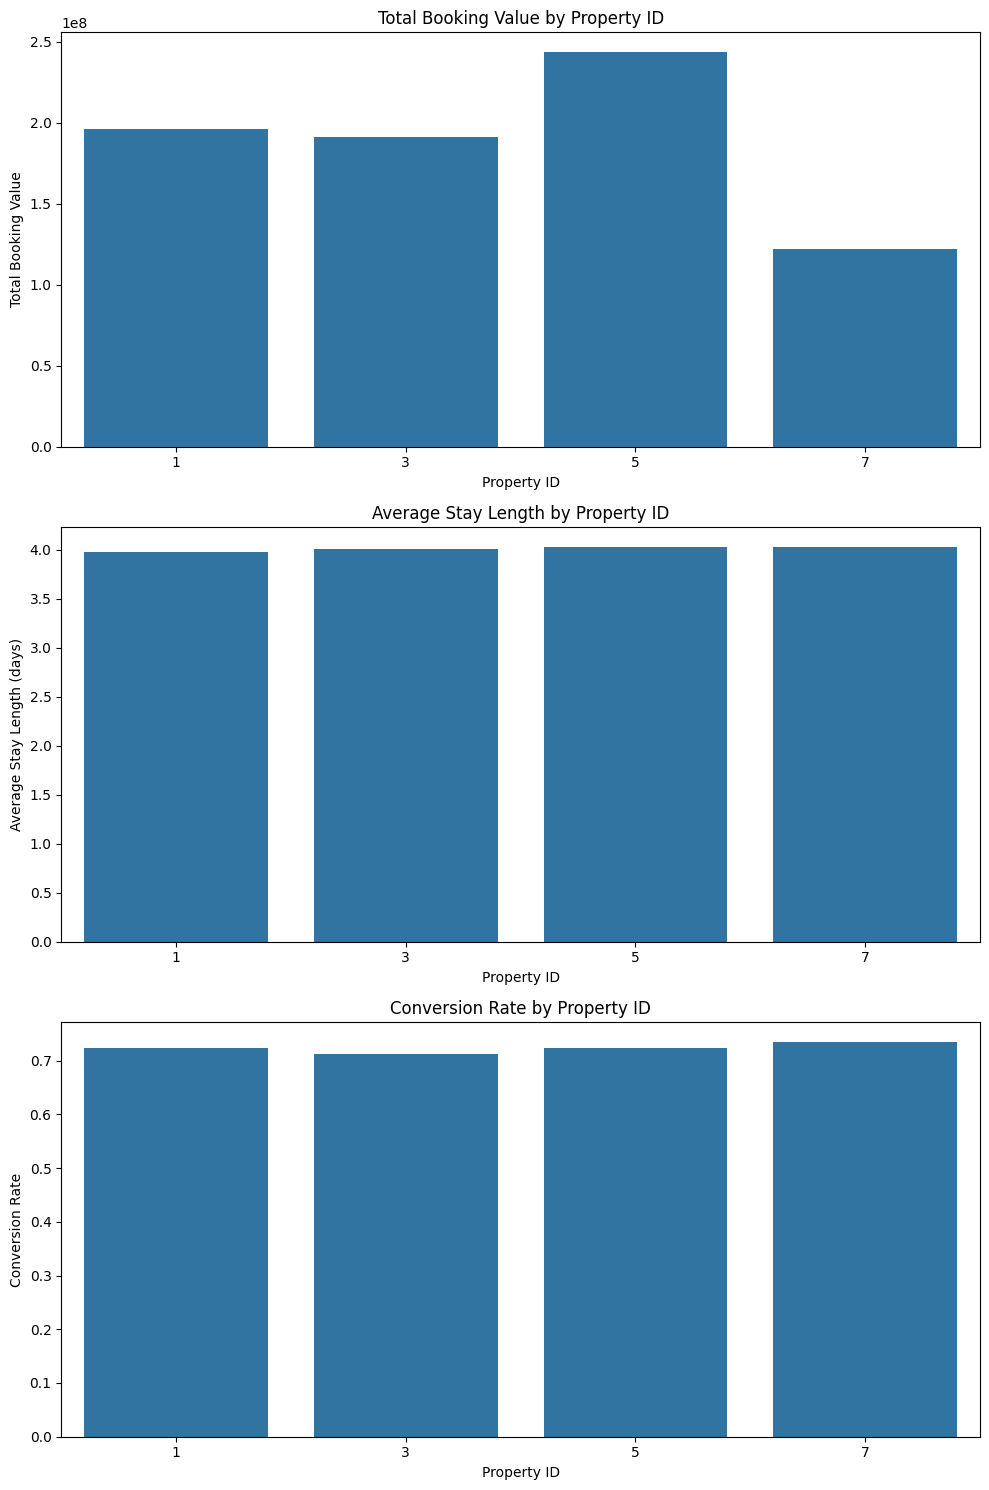

In [ ]:


# Visualize booking channel performance
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x='booking_channel', y='total_booking_value', data=booking_channel_performance, ax=axes[0])
axes[0].set_title('Total Booking Value by Booking Channel')
axes[0].set_xlabel('Booking Channel')
axes[0].set_ylabel('Total Booking Value')

sns.barplot(x='booking_channel', y='average_stay_length', data=booking_channel_performance, ax=axes[1])
axes[1].set_title('Average Stay Length by Booking Channel')
axes[1].set_xlabel('Booking Channel')
axes[1].set_ylabel('Average Stay Length (days)')

sns.barplot(x='booking_channel', y='conversion_rate', data=booking_channel_performance, ax=axes[2])
axes[2].set_title('Conversion Rate by Booking Channel')
axes[2].set_xlabel('Booking Channel')
axes[2].set_ylabel('Conversion Rate')

plt.tight_layout()
plt.show()

# Visualize property performance
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x='property_id', y='total_booking_value', data=property_performance, ax=axes[0])
axes[0].set_title('Total Booking Value by Property ID')
axes[0].set_xlabel('Property ID')
axes[0].set_ylabel('Total Booking Value')

sns.barplot(x='property_id', y='average_stay_length', data=property_performance, ax=axes[1])
axes[1].set_title('Average Stay Length by Property ID')
axes[1].set_xlabel('Property ID')
axes[1].set_ylabel('Average Stay Length (days)')

sns.barplot(x='property_id', y='conversion_rate', data=property_performance, ax=axes[2])
axes[2].set_title('Conversion Rate by Property ID')
axes[2].set_xlabel('Property ID')
axes[2].set_ylabel('Conversion Rate')

plt.tight_layout()
plt.show()

In [ ]:
avg_amount_channel = (
    merged_df.groupby('booking_channel')['selling_price']
    .mean()
    .reset_index()
    .rename(columns={'selling_price': 'avg_booking_amount'})
)

print(avg_amount_channel)

  booking_channel  avg_booking_amount
0      Mobile App        29422.507120
1    Travel Agent        29371.013378
2             Web        29597.382641


In [ ]:
avg_amount_property = (
    merged_df.groupby('property_id')['selling_price']
    .mean()
    .reset_index()
    .rename(columns={'selling_price': 'avg_booking_amount'})
    .sort_values(by='avg_booking_amount', ascending=False)
)

print(avg_amount_property.head(10))  # top 10 properties

   property_id  avg_booking_amount
3            7        29543.070197
1            3        29512.835420
2            5        29506.824442
0            1        29470.667606


In [ ]:
mode_star_rating = (
    merged_df.groupby('property_id')['star_rating']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .reset_index()
    .rename(columns={'star_rating': 'mode_star_rating'})
)

print(mode_star_rating.head(10))

   property_id  mode_star_rating
0            1                 4
1            3                 4
2            5                 4
3            7                 4


Seasonal and temporal trend analysis

In [ ]:
merged_df['booking_date'] = pd.to_datetime(merged_df['booking_date'])
merged_df['booking_month'] = merged_df['booking_date'].dt.month
merged_df['booking_day_of_week'] = merged_df['booking_date'].dt.dayofweek

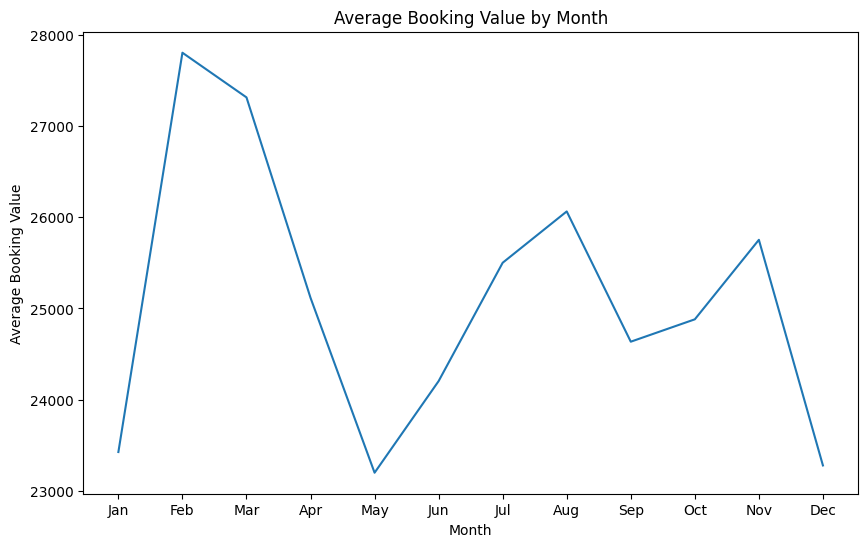

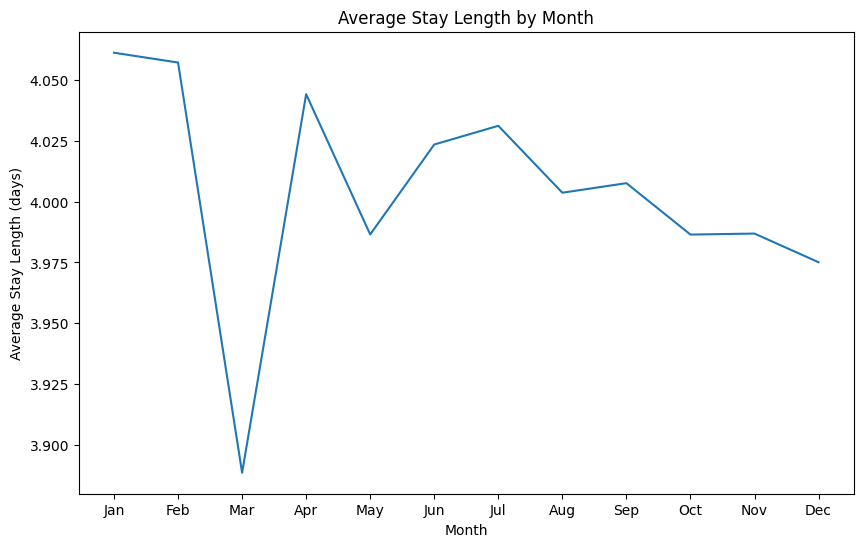

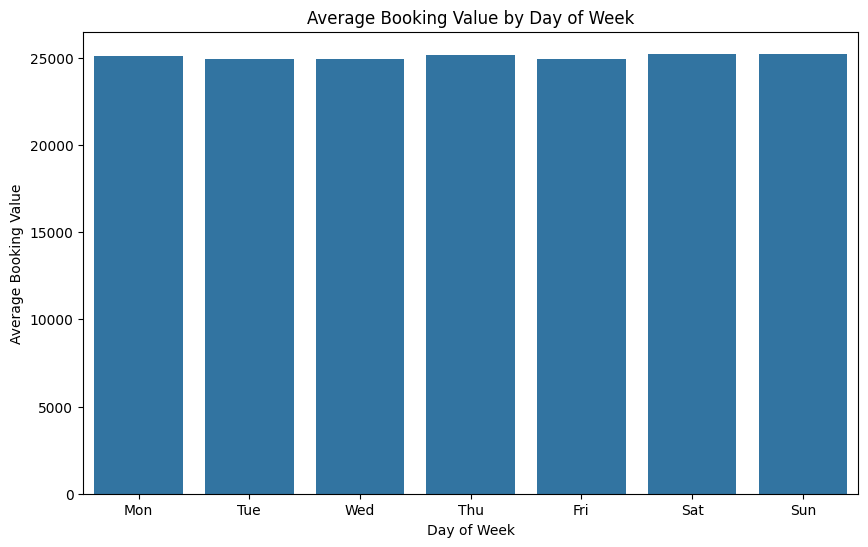

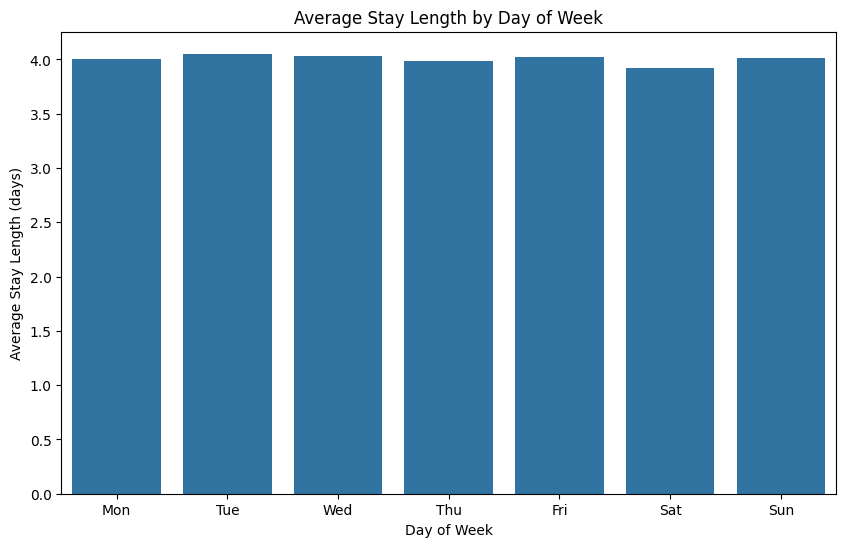

In [ ]:
import numpy as np
monthly_trends = merged_df.groupby('booking_month').agg(
    average_booking_value=('booking_value', 'mean'),
    average_stay_length=('stay_length', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='booking_month', y='average_booking_value', data=monthly_trends)
plt.title('Average Booking Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Booking Value')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='booking_month', y='average_stay_length', data=monthly_trends)
plt.title('Average Stay Length by Month')
plt.xlabel('Month')
plt.ylabel('Average Stay Length (days)')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

daily_trends = merged_df.groupby('booking_day_of_week').agg(
    average_booking_value=('booking_value', 'mean'),
    average_stay_length=('stay_length', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='booking_day_of_week', y='average_booking_value', data=daily_trends)
plt.title('Average Booking Value by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Booking Value')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='booking_day_of_week', y='average_stay_length', data=daily_trends)
plt.title('Average Stay Length by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Stay Length (days)')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [ ]:
repeat_customers = (
    merged_df.groupby('customer_id')
    .size()
    .reset_index(name='booking_count')
    .sort_values(by='booking_count', ascending=False)
)

print(repeat_customers.head(10))  # Top 10 repeat customers


     customer_id  booking_count
287          288            105
91            92            101
118          119             99
215          216             99
305          306             98
334          335             97
472          473             97
443          444             93
92            93             92
478          479             91


In [ ]:
repeat_only = repeat_customers[repeat_customers['booking_count'] > 1]
print(repeat_only.head(10))


     customer_id  booking_count
287          288            105
91            92            101
118          119             99
215          216             99
305          306             98
334          335             97
472          473             97
443          444             93
92            93             92
478          479             91


In [ ]:

def get_mode(x):
    return x.mode()[0] if not x.mode().empty else None

cust_df = merged_df[merged_df['customer_id'].isin([288, 92])]

# Build preference summary
cust_pref = cust_df.groupby('customer_id').agg({
    'city': get_mode,
    'payment_method': get_mode,
    'property_id': get_mode,
    'booking_channel': get_mode, # Corrected column name
    'check_in_date': lambda x: x.dt.month.mode()[0] if x.notna().any() else None,
    'stay_type': get_mode,
    'room_type': get_mode,
    'star_rating': get_mode, # Corrected column name
    'Coupon USed?': get_mode # Corrected column name
}).reset_index()

# Rename columns
cust_pref = cust_pref.rename(columns={
    'city': 'preferred_city',
    'payment_method': 'preferred_payment_method',
    'property_id': 'preferred_property_id',
    'booking_channel': 'preferred_channel',
    'check_in_date': 'preferred_travel_month',
    'stay_type': 'preferred_stay_type',
    'room_type': 'preferred_room_type',
    'star_rating': 'preferred_star_rating',
    'Coupon USed?': 'preferred_coupon_usage'
})

print(cust_pref)

   customer_id preferred_city preferred_payment_method  preferred_property_id  \
0           92         Boston               Debit Card                      5   
1          288  San Francisco            Bank Transfer                      1   

  preferred_channel  preferred_travel_month preferred_stay_type  \
0               Web                     2.0             Leisure   
1        Mobile App                     9.0             Leisure   

  preferred_room_type  preferred_star_rating preferred_coupon_usage  
0            Standard                      4                     No  
1            Standard                      3                     No  
